# Assignment #1

Please follow instruction below to complete your assingment.
You are expected to provide:
- data files
- IPython notebook

Please use code blocks to comment and explain your code.

STUDENT ID: 30715

In [5]:
%matplotlib inline
import os, sys
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# Import any other package you may need

## Erdos-Renyi network simulation

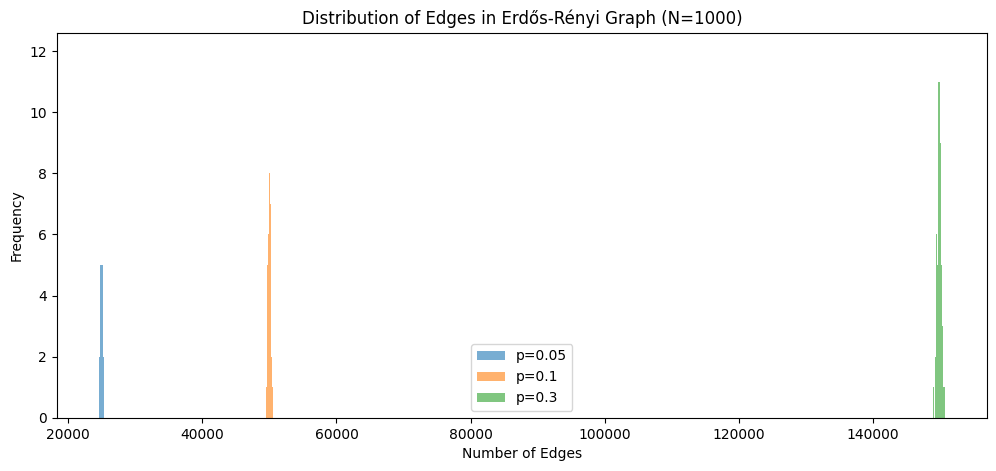

In [9]:
import random

def simulate_erdos_renyi(N, p):
    graph = nx.Graph()
    graph.add_nodes_from(range(N))  # Add N nodes

    # Iterate over all possible edges and add with probability p
    for i in range(N):
        for j in range(i + 1, N):  # Avoid duplicate edges and self-loops
            if random.random() < p:  # Add edge with probability p
                graph.add_edge(i, j)

    return graph

# Parameters
N = 1000  # Number of nodes
p_values = [0.05, 0.1, 0.3]
num_iterations = 100
edge_counts = {p: [] for p in p_values}

# Simulating for different p values
for p in p_values:
    for _ in range(num_iterations):
        G = simulate_erdos_renyi(N, p)
        edge_counts[p].append(G.number_of_edges())

# Plot histograms
plt.figure(figsize=(12, 5))

for p in p_values:
    plt.hist(edge_counts[p], bins=20, alpha=0.6, label=f'p={p}')

plt.xlabel('Number of Edges')
plt.ylabel('Frequency')
plt.title(f'Distribution of Edges in Erdős-Rényi Graph (N={N})')
plt.legend()
plt.show()


# Network generation and node properties

Request and download dataset for your own social media accounts and analyze using network science methods.

If you are not a frequnt users, you can select 3 networks with different categorical subdomains using the database below.

https://icon.colorado.edu/#!/networks

Please keep the networks smaller than 10.000 nodes.

Explore the different algorithms available on networkx for node and graph level properties.
https://networkx.org/documentation/stable/reference/algorithms/index.html

1) You should cover at least
- node clustering coefficient, degree, strength
- graph density, largest connected components size, radius

2) Plot degree distribution. Depending on the graph topology either use linear or logarithmic scale.

3) For each edge, plot heatmap for degree of the nodes at each end and discuss whether the network is assortative or disassortative.

### Network analysis

In [11]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import networkx as nx
import csv

# Load network from edge list file
def load_edge_list(file_path, delimiter=None):
    G = nx.Graph()
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("#") or len(line.strip()) == 0:
                continue  # Skip comments and empty lines
            data = line.strip().split(delimiter)
            if len(data) >= 2:
                node1, node2 = int(data[0]), int(data[1])
                weight = float(data[2]) if len(data) > 2 else 1.0
                G.add_edge(node1, node2, weight=weight)
    return G

# Load network from CSV file
def load_csv(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header if present
        for row in reader:
            if len(row) >= 2:
                node1, node2 = int(row[0]), int(row[1])
                weight = float(row[2]) if len(row) > 2 else 1.0
                G.add_edge(node1, node2, weight=weight)
    return G

# Compute and print graph properties
def graph_properties(G, graphname):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / num_nodes
    density = nx.density(G)
    clustering_coeff = nx.average_clustering(G)

    # Largest connected component
    largest_component = max(nx.connected_components(G), key=len)
    largest_component_size = len(largest_component)
    subgraph = G.subgraph(largest_component)
    radius = nx.radius(subgraph)

    print(f"\n{graphname} Graph Properties:")
    print(f" - Number of nodes: {num_nodes}")
    print(f" - Number of edges: {num_edges}")
    print(f" - Average degree: {avg_degree:.2f}")
    print(f" - Density: {density:.4f}")
    print(f" - Average clustering coefficient: {clustering_coeff:.4f}")
    print(f" - Largest connected component size: {largest_component_size}")
    print(f" - Radius of the largest connected component: {radius}")

# Export graph to GEXF file
def export_gexf(G, filename):
    nx.write_gexf(G, f"{filename}.gexf")
    print(f"Graph exported to '{filename}.gexf'")

# Load your networks (update paths to where you saved them on Google Drive)
DRUGNET_graph = load_csv('/content/drive/MyDrive/cs414/DRUGNET.csv')
bitcoin_graph = load_csv('/content/drive/MyDrive/cs414/soc-sign-bitcoinalpha.csv')
gnutella_graph = load_edge_list('/content/drive/MyDrive/cs414/p2p-Gnutella08.txt')

# Analyze networks
graph_properties(DRUGNET_graph, "DRUGNET")
graph_properties(bitcoin_graph, "BitcoinAlpha")
graph_properties(gnutella_graph, "Gnutella")

# Export to GEXF
export_gexf(DRUGNET_graph, "DRUGNET")
export_gexf(bitcoin_graph, "BitcoinAlpha")
export_gexf(gnutella_graph, "Gnutella")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

DRUGNET Graph Properties:
 - Number of nodes: 294
 - Number of edges: 293
 - Average degree: 1.99
 - Density: 0.0068
 - Average clustering coefficient: 0.0000
 - Largest connected component size: 294
 - Radius of the largest connected component: 2

BitcoinAlpha Graph Properties:
 - Number of nodes: 3782
 - Number of edges: 14123
 - Average degree: 7.47
 - Density: 0.0020
 - Average clustering coefficient: 0.1767
 - Largest connected component size: 3774
 - Radius of the largest connected component: 5

Gnutella Graph Properties:
 - Number of nodes: 6301
 - Number of edges: 20777
 - Average degree: 6.59
 - Density: 0.0010
 - Average clustering coefficient: 0.0109
 - Largest connected component size: 6299
 - Radius of the largest connected component: 6
Graph exported to 'DRUGNET.gexf'
Graph exported to 'BitcoinAlpha.gexf'
Graph exported to 'Gnutella.gexf'


### Plot degree distribution

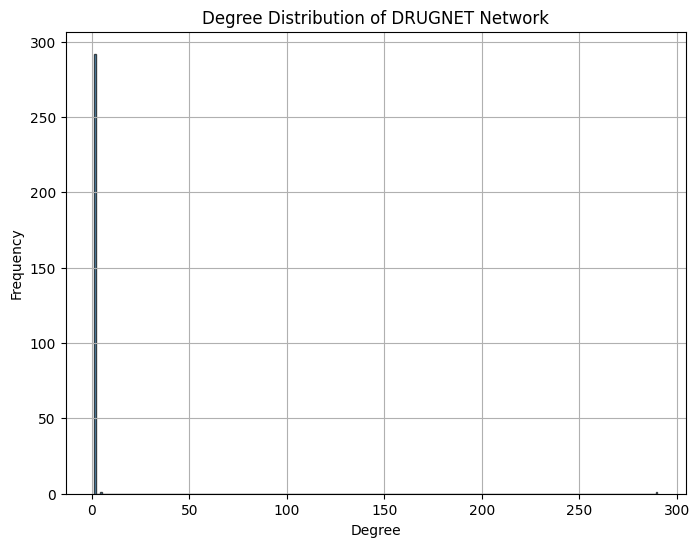

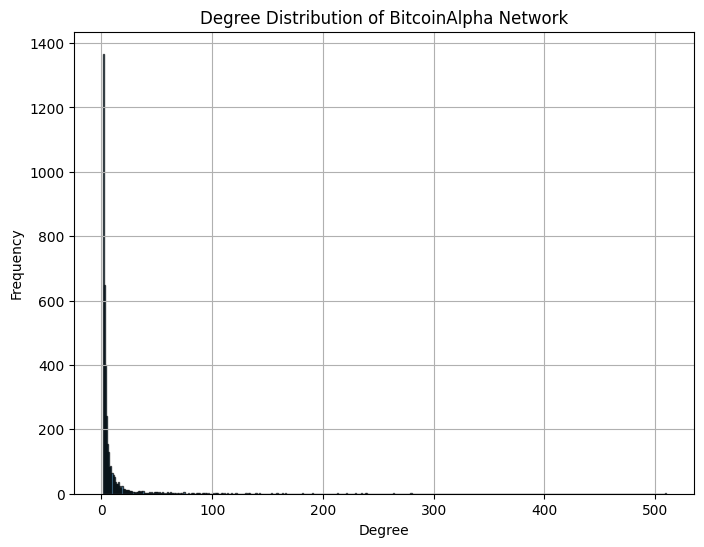

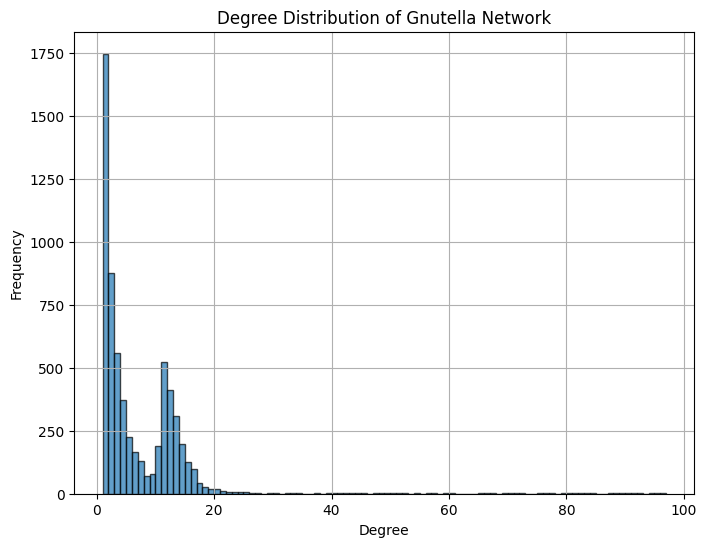

In [7]:
import matplotlib.pyplot as plt

# Plot degree distribution
def plot_degree_distribution(G, graphname):
    # Get the degree of each node in the graph
    degrees = [degree for node, degree in G.degree()]

    # Plot the degree distribution
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), edgecolor='black', alpha=0.7)
    plt.title(f"Degree Distribution of {graphname} Network")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Plot degree distributions for the three graphs
plot_degree_distribution(DRUGNET_graph, "DRUGNET")
plot_degree_distribution(bitcoin_graph, "BitcoinAlpha")
plot_degree_distribution(gnutella_graph, "Gnutella")


### Assortativeness analysis

Assortativity coefficient for DRUGNET: -0.9801


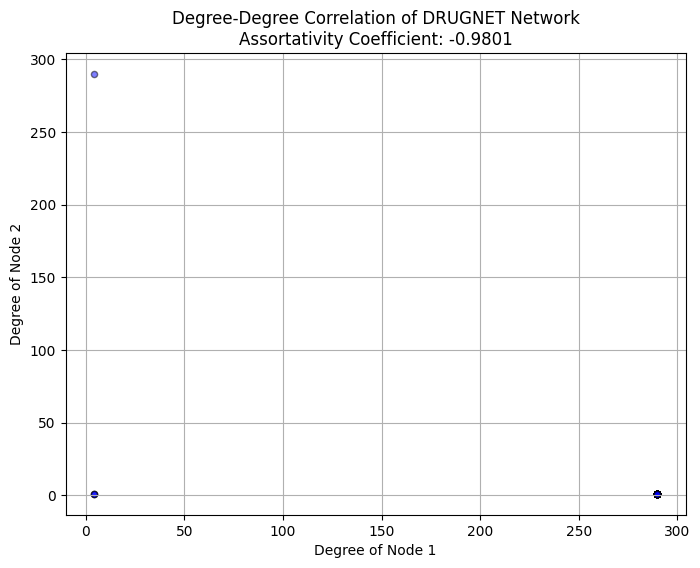

Assortativity coefficient for BitcoinAlpha: -0.1686


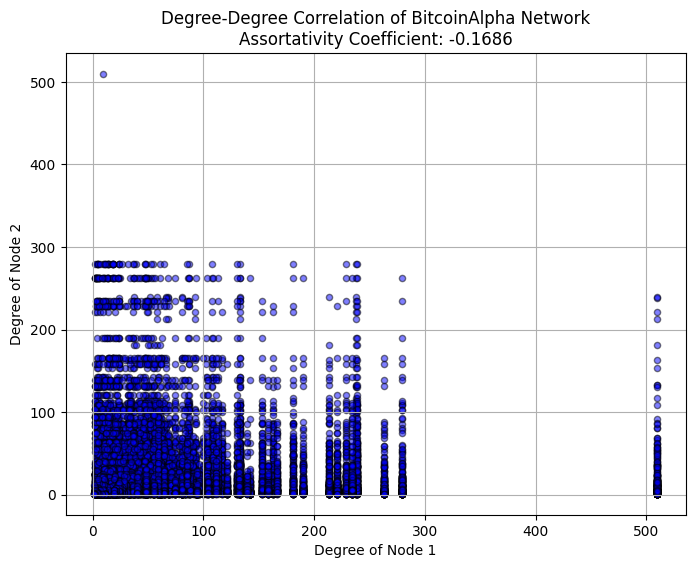

Assortativity coefficient for Gnutella: 0.0356


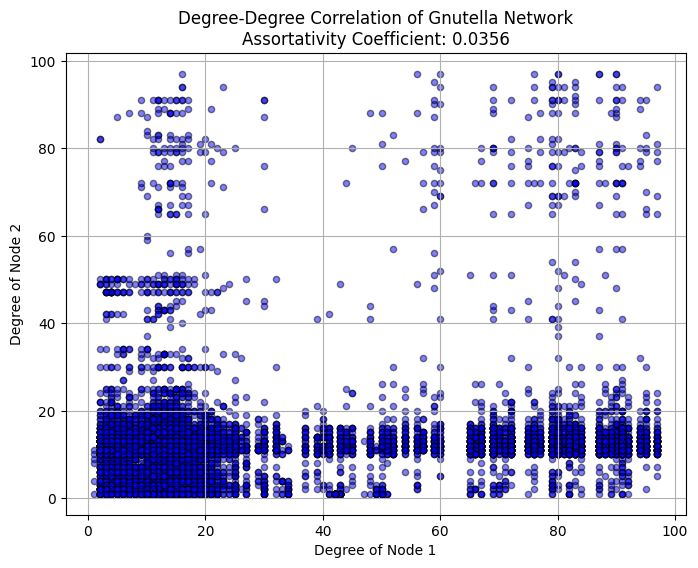

In [8]:
# Plot assortativity (degree-degree correlation) for a network
def plot_assortativity(G, graphname):
    # Calculate degree assortativity coefficient
    assortativity = nx.degree_assortativity_coefficient(G)
    print(f"Assortativity coefficient for {graphname}: {assortativity:.4f}")

    # Extract node degree pairs from edges
    node_degrees = [(G.degree[node1], G.degree[node2]) for node1, node2 in G.edges()]

    # Separate the degree pairs into x (degree of node1) and y (degree of node2)
    x_degrees, y_degrees = zip(*node_degrees)

    # Plot degree-degree correlation
    plt.figure(figsize=(8, 6))
    plt.scatter(x_degrees, y_degrees, alpha=0.5, color='b', edgecolor='k', s=20)
    plt.title(f"Degree-Degree Correlation of {graphname} Network\nAssortativity Coefficient: {assortativity:.4f}")
    plt.xlabel("Degree of Node 1")
    plt.ylabel("Degree of Node 2")
    plt.grid(True)
    plt.show()

# Plot assortativity for the three graphs
plot_assortativity(DRUGNET_graph, "DRUGNET")
plot_assortativity(bitcoin_graph, "BitcoinAlpha")
plot_assortativity(gnutella_graph, "Gnutella")


# Cayley tree

You can find more information about Cayley tree or bethe lattice below

https://en.wikipedia.org/wiki/Bethe_lattice